In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DatabaseDF = pd.read_csv('../CleanedDataset.csv')

## Definition

A major part in our data comes from knowing when the well was first drilled, exploring this extra dimensionality is a good way to visualize how time plays a role in the development of wells, and could perhaps aid us in understanding what used to work vs what works now

## Overview / Data Cleanup

In [3]:
from datetime import datetime

In [4]:
DateDF = DatabaseDF[DatabaseDF['Date Fracd'].notna()]

datetimeList = []

for index,row in DateDF.iterrows():
    datetimeList.append(datetime.strptime(str(row['Date Fracd']),'%Y-%m-%d'))

DateDF['DateTimeObject'] = datetimeList

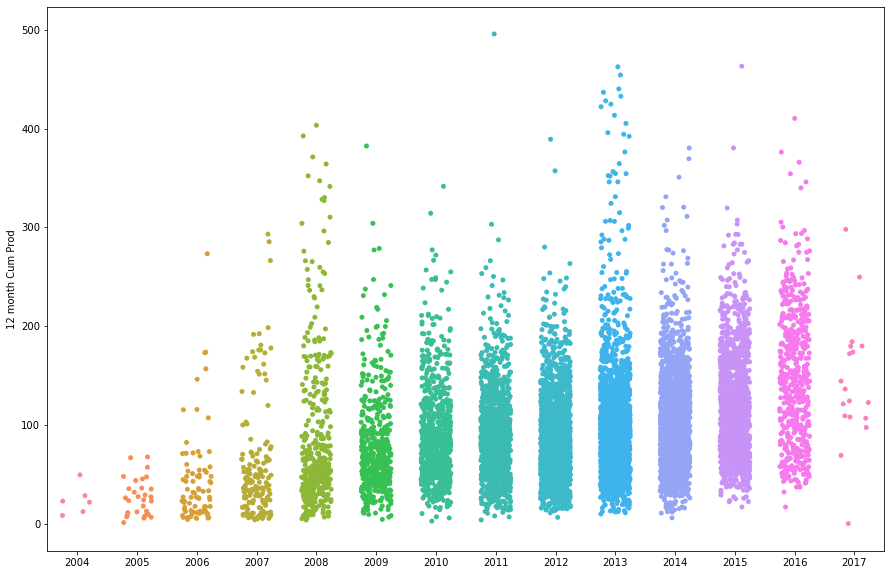

In [5]:
plt.subplots(figsize = (15,10))
xList = []

for xi in DateDF['DateTimeObject']:
    xList.append(int(xi.strftime('%Y')))

sns.stripplot(x = xList, y = DateDF['12 month Cum Prod'], jitter = .25)

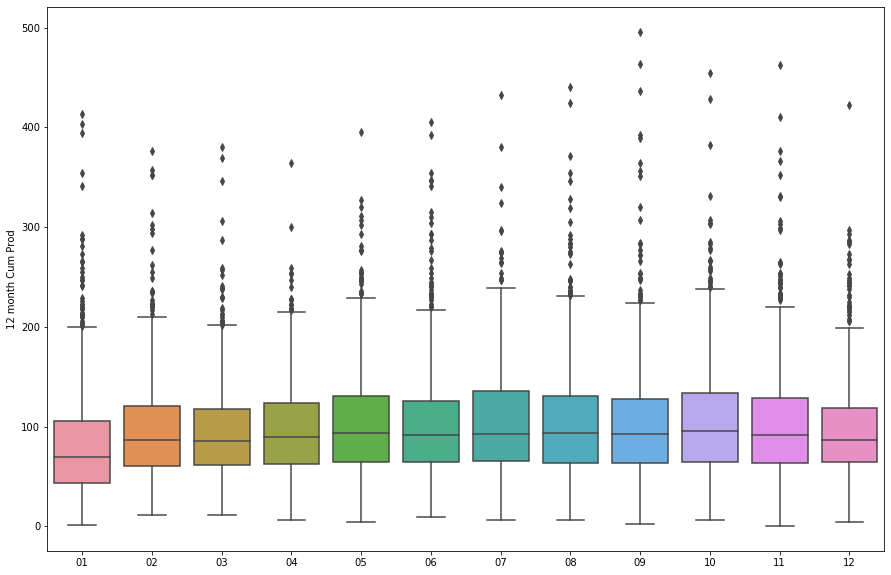

In [6]:
plt.subplots(figsize = (15,10))
xList = []

for xi in DateDF['DateTimeObject']:
    xList.append(xi.strftime('%m'))

sns.boxplot(x = xList, y = DateDF['12 month Cum Prod'])

## Increase in Production by Year

In [7]:
def expFunc(x, a, b, c):
    return a * (b**x) + c

def polyDegree2(x, a, b, c):
    return a*(x**2) + b*x + c

def polyDegree3(x, a, b, c, d):
    return a*(x**3) + b*(x**2)

In [8]:
from scipy.optimize import curve_fit
import random

In [9]:
def plotCurves(xDateUnit = '%y' , xlabel = "x-axis", ylabel = '12 month Cum Prod'):
    
    ## Setup
    xList = []

    for xi in DateDF['DateTimeObject']:
        xList.append(int(xi.strftime(xDateUnit)))

    yList = DateDF[ylabel]

    cutoff = round(len(xList) * .75)

    xModel = xList[:cutoff]
    xTest = xList[cutoff:]

    yModel = yList[:cutoff]
    yTest = yList[cutoff:]

    ## Fitting
    Epopt, Epcov = curve_fit(expFunc, xModel, yModel)

    P2popt, P2pcov = curve_fit(polyDegree2, xModel, yModel)

    P3popt, P3pcov = curve_fit(polyDegree3, xModel, yModel)

    ## Mean Absolute Error Calculations
    ExpSum = 0
    Poly2Sum = 0
    Poly3Sum = 0

    for x, y in zip(xTest, yTest):
        ExpSum += abs(y - expFunc(x, Epopt[0], Epopt[1], Epopt[2]))
        Poly2Sum += abs(y - polyDegree2(x, P2popt[0], P2popt[1], P2popt[2]))
        Poly3Sum += abs(y - polyDegree3(x, P3popt[0], P3popt[1], P3popt[2], P3popt[3]))

    ExpSum = ExpSum / len(xTest)
    Poly2Sum = Poly2Sum / len(xTest)
    Poly3Sum = Poly3Sum / len(xTest)

    ELabel = "Exponential MAE: " +  str(round(ExpSum,3))
    Poly2Label = "2nd Degree Poly MAE: " + str(round(Poly2Sum,3))
    Poly3label = "3rd Degree Poly MAE: "+ str(round(Poly3Sum,3))

    ## Plotting
    plt.subplots(figsize = (15,10))
    plt.plot(xList ,yList , 'bo')

    x_plot = np.linspace(min(xList) - 1,max(xList) + 1,max(xList) + 2)

    plt.plot(x_plot,expFunc(x_plot, Epopt[0], Epopt[1], Epopt[2]), 'r-', linewidth = 4, label = ELabel)

    plt.plot(x_plot, polyDegree2(x_plot, P2popt[0], P2popt[1], P2popt[2]), 'g-', linewidth = 4, label = Poly2Label)

    plt.plot(x_plot, polyDegree3(x_plot, P3popt[0], P3popt[1], P3popt[2], P3popt[3]), 'y-', linewidth = 4, label = Poly3label)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()


In [10]:
def getCurves(xDateUnit = '%y', ylabel = '12 month Cum Prod'):
    
    ## Setup
    xList = []

    for xi in DateDF['DateTimeObject']:
        xList.append(int(xi.strftime(xDateUnit)))

    yList = DateDF[ylabel]

    cutoff = round(len(xList) * .75)

    xModel = xList[:cutoff]
    xTest = xList[cutoff:]

    yModel = yList[:cutoff]
    yTest = yList[cutoff:]

    ## Fitting
    Epopt, Epcov = curve_fit(expFunc, xModel, yModel)

    P2popt, P2pcov = curve_fit(polyDegree2, xModel, yModel)

    P3popt, P3pcov = curve_fit(polyDegree3, xModel, yModel)

    ## Mean Absolute Error Calculations
    ExpSum = 0
    Poly2Sum = 0
    Poly3Sum = 0

    for x, y in zip(xTest, yTest):
        ExpSum += abs(y - expFunc(x, Epopt[0], Epopt[1], Epopt[2]))
        Poly2Sum += abs(y - polyDegree2(x, P2popt[0], P2popt[1], P2popt[2]))
        Poly3Sum += abs(y - polyDegree3(x, P3popt[0], P3popt[1], P3popt[2], P3popt[3]))

    ExpSum = ExpSum / len(xTest)
    Poly2Sum = Poly2Sum / len(xTest)
    Poly3Sum = Poly3Sum / len(xTest)

    return [Epopt, Epcov, ExpSum] , [P2popt, P2pcov, Poly2Sum], [P3popt, P3pcov, Poly3Sum]


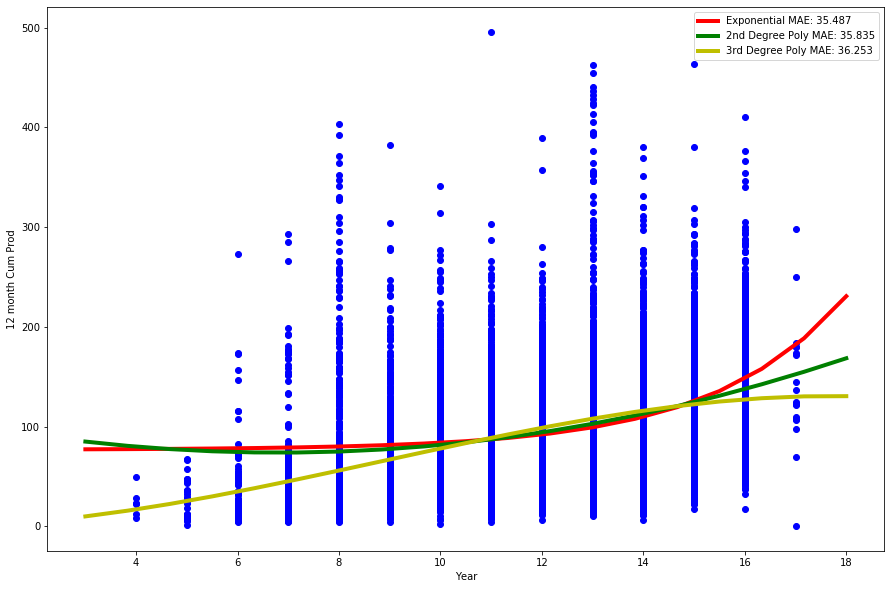

In [11]:
plotCurves(xlabel = "Year")